# Heart Attack Analysis and Prediction 

## About this Project

Heart disease remains a significant global threat, with one in five deaths in the US attributed to heart attacks, underscoring the urgent need for accurate prediction methods. This project utilizes predictive analytics to develop a model targeting individuals vulnerable to heart attacks.

Throughout this undertaking, we will explore the dataset, conduct in-depth data analysis, preprocess the data to ensure its integrity and suitability for modeling, and ultimately create and evaluate a predictive model. The goal is not only to establish a robust and accurate predictive model but also to uncover insights into the underlying factors shaping the risk of heart disease.

## The Road Ahead

##### Step 1: Import Libraries and Data Sets
##### Step 2: Prepare Features 
##### Step 3: Prepare for LSTM Sequence
##### Step 4: K-Fold Cross-Validation and Training
##### Step 5: Evaluate Model and Display Loss
##### Step 6: Determine Probabilities for Each Sample using the Model

## Questions to think about

##### Why a Recurrent Neural Network?
##### What can I do to improve model functionality?
##### What factors are associated with heart attacks?

## Step 1: Import Libraries and Data Sets

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
# Redirect stderr to /dev/null
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.regularizers import L1, L2
from keras import regularizers

import warnings # suppress warnings 

In [3]:
df = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


The DataFrame has 303 entries (rows).
Each column has 303 non-null values, which means there are no missing values.

Since all columns have the same non-null count as the total number of entries (303), you can conclude that there are no missing values in the dataset. 

In [3]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### DESCRIPTION OF COLUMNS: 

age: Age of individuals.

sex: Gender of individuals (1 for male, 0 for female).

cp: Chest pain type (0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic).

trtbps: Resting blood pressure (in mm Hg).

chol: Serum cholesterol level (in mg/dl).

fbs: Fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false).

restecg: Resting electrocardiographic results (0: normal, 1: having ST-T wave abnormality, 2: showing probable or definite left ventricular hypertrophy by Estes' criteria).

thalachh: Maximum heart rate achieved.

exng: Exercise induced angina (1 = yes, 0 = no).

oldpeak: ST depression induced by exercise relative to rest.

slp: Slope of the peak exercise ST segment (0: downsloping, 1: flat, 2: upsloping).

caa: Number of major vessels (0-3) colored by fluoroscopy.

thall: Thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect).

output: Target variable indicating presence of heart disease (1 = disease present, 0 = disease not present).


#### DESCRIPTION OF ROWS:  

count: Number of non-null values in each column.

mean: Mean value of each column.

std: Standard deviation of each column.

min: Minimum value of each column.

25%: 25th percentile (first quartile) of each column.

50%: 50th percentile (median) of each column.

75%: 75th percentile (third quartile) of each column.

max: Maximum value of each column.

In [4]:
df.head(200)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,59,1,0,170,326,0,0,140,1,3.4,0,0,3,0
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3,0
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0


In [4]:
df['output'].value_counts(normalize=True)

output
1    0.544554
0    0.455446
Name: proportion, dtype: float64

1 represents the presence of heart disease, while 0 represents the absence of heart disease.

The proportion of individuals who experienced a heart attack (output = 1) is approximately 54.46%.

The proportion of individuals who experienced a heart attack (output = 0) is approximately 45.54%.

This information gives you an understanding of the distribution of the target variable 'output' in the dataset. It indicates that there's a slightly higher proportion of individuals who had a heart attack compared to those who have not.

In [23]:
# Total count of males and females
total_males = df[df['sex'] == 1].shape[0]
total_females = df[df['sex'] == 0].shape[0]

# Calculate the percentage of males and females with a heart attack
percentage_males_with_heart_attack = (count_males_with_heart_attack / total_males) * 100
percentage_females_with_heart_attack = (count_females_with_heart_attack / total_females) * 100

print("Percentage of males with a heart attack:  ", percentage_males_with_heart_attack, "%")
print("Percentage of females with a heart attack:", percentage_females_with_heart_attack, "%")

Percentage of males with a heart attack:   44.927536231884055 %
Percentage of females with a heart attack: 75.0 %


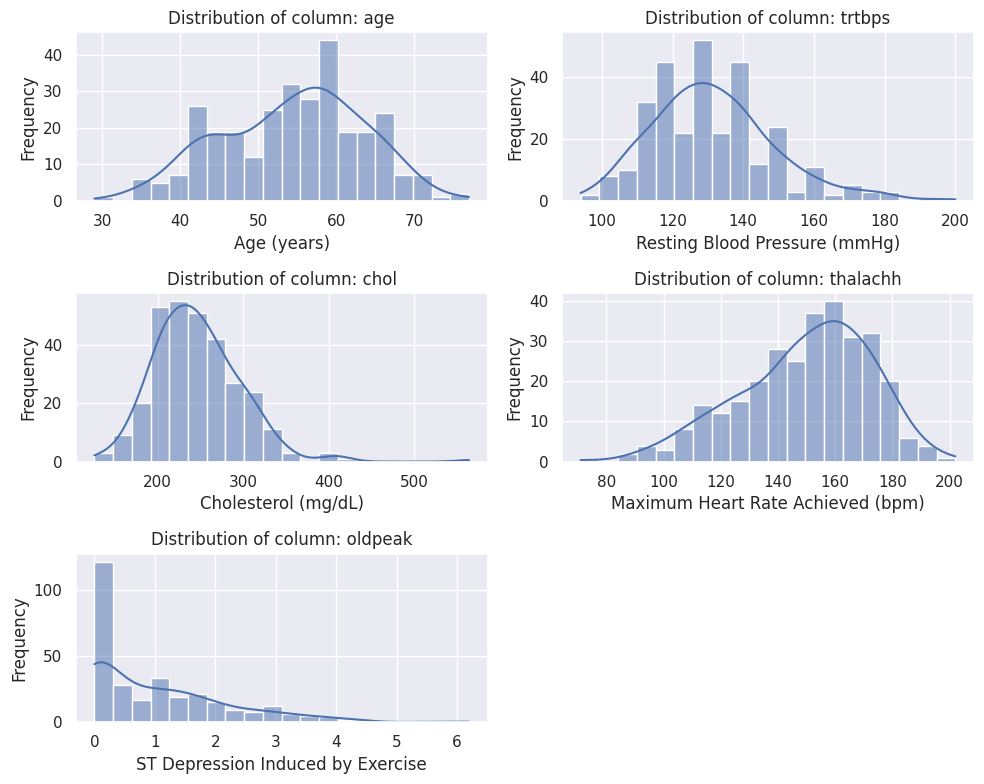

In [5]:
# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.set_theme()

num_columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
labels = ['Age (years)', 'Resting Blood Pressure (mmHg)', 'Cholesterol (mg/dL)', 
          'Maximum Heart Rate Achieved (bpm)', 'ST Depression Induced by Exercise']

# Set up the plot layout
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each column for plotting its distribution
for i, (column, label) in enumerate(zip(num_columns, labels)):
    # Plotting distribution using seaborn's displot function
    sns.histplot(df[column], kde=True, ax=axes[i], bins=20)
    axes[i].set_xlabel(label)  # Set x-axis label
    axes[i].set_ylabel('Frequency')  # Set y-axis label
    axes[i].set_title(f'Distribution of column: {column}') # Add title

# Turn off the last axis
axes[-1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

## Step 2: Prepare Features 

In [7]:
# Let's assume 'age' is an important feature, but its relationship with the target might not be linear
# We can create a new feature by taking the square root of 'age'
df['age_sqrt'] = np.sqrt(df['age'])

# Create an interaction feature between 'age' and 'thalachh' (maximum heart rate achieved)
df['age_thalachh_interaction'] = df['age'] * df['thalachh']

#'output' is the target column
y = df['output']
x = df.drop('output', axis=1)
x = x.drop(['age_sqrt', 'age_thalachh_interaction'], axis=1)

print(x.shape) # 303 observations and 13 independent features
print(y.shape) # one target feature

(303, 13)
(303,)


As I was looking through the data, I thought 'age' might be important for predicting heart disease. But I also knew that the relationship between age and heart disease might not be a simple one. So, I did something called "feature engineering", where I created a new number from age by taking its square root. I thought this new number might help the model understand age better. I also thought that age and the maximum heart rate might also be connected in a special way. So, I made a new feature for those as well. I thought this might show how age and the heart rate work together to affect heart disease.

After doing all this work, I tried using these new features in my model. But when I checked how well my model was doing, I found out that these new features didn't make it better. In fact, they seemed to make things more convoluted. Naturally, I decided to take them out to keep things simple to improve the performance of my model. 

Lastly, I made sure that my data was ready for the computer to use. I separated the information about whether someone had heart disease (the target, in this case 'output') from all the other information (the features). Then, I checked to make sure everything was the right size and shape for the model to function appropriately. 

In [8]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age_sqrt,age_thalachh_interaction
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,7.346681,8053.122112
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.627627,1471.756405
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.385165,4550.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,6.891929,6944.500000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,7.416198,8120.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,7.810250,9104.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,8.774964,12474.000000


## Step 3: Prepare for LSTM Sequence 

In [9]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [10]:
# Define the number of time steps for the LSTM
n_steps = 5

# Define the Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=50)  # Monitor validation loss for 50 epochs

In [11]:
def prepare_sequences(data, targets, n_steps):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix > len(data)-1:
            break
        seq_x, seq_y = data[i:end_ix], targets[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [12]:
# Prepare sequences for LSTM
X_lstm, y_lstm = prepare_sequences(X_scaled, y.values, n_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

## Step 4: K-Fold Cross-Validation

In [ ]:
# Define number of folds for K-fold cross-validation
n_splits = 5

# Initialize K-fold cross-validator
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store MSE for each fold
mse_scores = []

In [14]:
# Perform K-fold cross-validation
from sklearn.metrics import mean_squared_error

for train_index, val_index in kf.split(X_lstm, y_lstm):
    X_train_cv, X_val_cv = X_lstm[train_index], X_lstm[val_index]
    y_train_cv, y_val_cv = y_lstm[train_index], y_lstm[val_index]
    
    # Ensure the target data has the correct shape
    y_train_cv = y_train_cv.reshape(-1, 1)
    y_val_cv = y_val_cv.reshape(-1, 1)
    
    # Define and compile the model with appropriate activation and loss function
    model = Sequential()
    model.add(Input(shape=(n_steps, X_train.shape[2])))
    model.add(Bidirectional(LSTM(32, activation='relu', return_sequences=True, kernel_regularizer=regularizers.l2(0.01))))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    model.add(Bidirectional(LSTM(16, activation='relu', return_sequences=True, kernel_regularizer=regularizers.l2(0.01))))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    model.add(Bidirectional(LSTM(16, activation='relu', kernel_regularizer=regularizers.l2(0.01))))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))  # Use sigmoid activation for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy')  # Use binary cross-entropy loss

    # Train the model
    history = model.fit(X_train_cv, y_train_cv, epochs=350, batch_size=32, verbose=0,
                        validation_data=(X_val_cv, y_val_cv), callbacks=[early_stopping])
    
    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    
# Calculate the average MSE across all folds
average_mse = np.mean(mse_scores)
print("Average Mean Squared Error (Cross-Validation):", average_mse)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
Average Mean Squared Error (Cross-Validation): 2.0012634836650067e-05


## Step 5: Evaluate Model and Display Loss

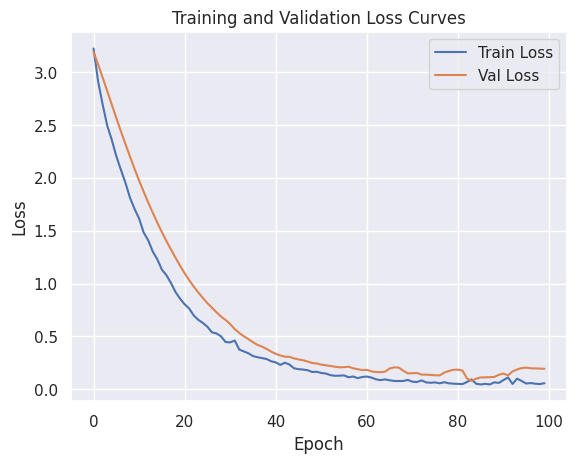

Final Training Loss: 0.057738032191991806
Final Validation Loss: 0.19421575963497162
Mean Squared Error: 0.04324052855372429


In [15]:
# Plot the training and validation loss curves
plt.title('Training and Validation Loss Curves')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Print the final training and validation losses
print("Final Training Loss:", history.history['loss'][-1])
print("Final Validation Loss:", history.history['val_loss'][-1])

# This will reshape y_test from (60,) to (60, 1), making it compatible 
# with the expected shape by model.evaluate().
y_test = y_test.reshape(-1, 1)

# Evaluate the model and calculate MSE
mse = model.evaluate(X_test, y_test, verbose=0)
print("Mean Squared Error:", mse)

## Step 6: Determine Probabilities for Each Sample using the Model

In [16]:
# Suppress the warning about feature names not being available
warnings.filterwarnings("ignore", message="X does not have valid feature names")

# Create a new scaler object 
scaler_example = StandardScaler()

# Fit the scaler only on the relevant features (without age_sqrt and age_thalachh_interaction)
x_example = df.drop(['output', 'age_sqrt', 'age_thalachh_interaction'], axis=1)
scaled_x_example = scaler_example.fit_transform(x_example)

# Create the example inputs array with the scaled features
example_inputs = np.array([
    # likely
    [63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1],  # Sample 1
    [37, 1, 2, 130, 250, 0, 1, 187, 0, 3.5, 0, 0, 2],  # Sample 2
    [41, 0, 1, 130, 204, 0, 0, 172, 0, 1.4, 2, 0, 2],  # Sample 3
    [56, 1, 1, 120, 236, 0, 1, 178, 0, 0.8, 2, 0, 2],  # Sample 4
    [57, 0, 0, 120, 354, 0, 1, 163, 1, 0.6, 2, 0, 2],  # Sample 5
    # not likely
    [59, 1, 0, 170, 326, 0, 0, 140, 1, 3.4, 0, 0, 3],  # Sample 6
    [46, 1, 2, 150, 231, 0, 1, 147, 0, 3.6, 1, 0, 2],  # Sample 7
    [67, 1, 0, 125, 254, 1, 1, 163, 0, 0.2, 1, 2, 3],  # Sample 8
    [62, 1, 0, 120, 267, 0, 1, 99, 1, 1.8, 1, 2, 3],   # Sample 9
    [65, 1, 0, 110, 248, 0, 0, 158, 0, 0.6, 2, 2, 1],  # Sample 10
])

# Scale the example inputs
scaled_example_inputs = scaler.transform(example_inputs)

# Reshape the example data
reshaped_example_inputs = np.expand_dims(scaled_example_inputs, axis=1)

# Predict the probability of a heart attack for each sample
predicted_probs = model.predict(reshaped_example_inputs)

# Print the predicted probabilities and likelihood for each sample
for i, prob in enumerate(predicted_probs):
    likelihood = "Likely" if prob[0] >= 0.5 else "Not Likely"
    print(f"Sample {i+1}: Predicted Probability: {prob[0]}, \tLikelihood: {likelihood}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Sample 1: Predicted Probability: 0.6669818758964539, 	Likelihood: Likely
Sample 2: Predicted Probability: 0.7031674981117249, 	Likelihood: Likely
Sample 3: Predicted Probability: 0.7617881298065186, 	Likelihood: Likely
Sample 4: Predicted Probability: 0.7032248973846436, 	Likelihood: Likely
Sample 5: Predicted Probability: 0.6336777806282043, 	Likelihood: Likely
Sample 6: Predicted Probability: 0.3132112920284271, 	Likelihood: Not Likely
Sample 7: Predicted Probability: 0.5835526585578918, 	Likelihood: Likely
Sample 8: Predicted Probability: 0.5783371925354004, 	Likelihood: Likely
Sample 9: Predicted Probability: 0.2324887067079544, 	Likelihood: Not Likely
Sample 10: Predicted Probability: 0.43206509947776794, 	Likelihood: Not Likely


#### 8 out of 10, not too shabby. Would I trust my model to predict the likelihood of experiencing a heart attack? Not quite. 

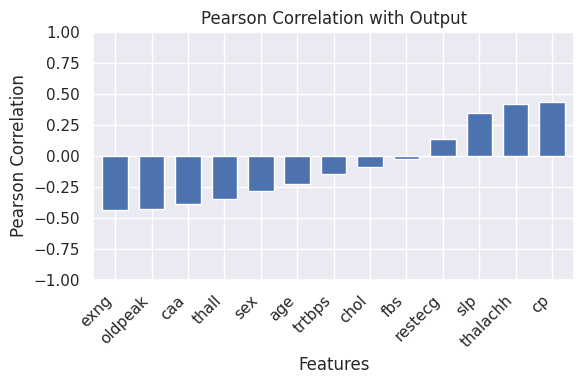

In [26]:
# Compute Pearson correlation coefficients
correlations = df.corr(numeric_only=True)['output'][:-1].sort_values()

#Plotting
plt.figure(figsize=(6, 4))
ax = correlations.plot(kind='bar', width=0.7)
ax.set(ylim=[-1, 1], ylabel='Pearson Correlation', xlabel='Features', 
       title='Pearson Correlation with Output')
ax.set_xticklabels(correlations.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

Here, we can see that the chest pain type, maximum heart rate and slope of the ST segment are positively correlated with experiencing a heart attack.

## Reflection 

### Some factors associated with a higher likelihood of heart attack:  

##### Maximum HR (thalachh): Thalachh, or maximum heart rate achieved during exercise, is a known risk factor for heart disease. Higher thalachh values may indicate a higher risk of heart attack.
##### Chest Pain(cp): Chest pain type, categorized as typical angina, atypical angina, non-anginal pain, or asymptomatic, is a critical indicator of heart disease risk. Certain types of chest pain, especially atypical angina and non-anginal pain, may be associated with a higher likelihood of heart attack.
##### Slope(slp): The slope of the ST segment during exercise, which reflects electrocardiographic changes, is an important predictor of heart disease. Abnormalities in the ST segment slope may indicate a higher risk of heart attack. 
##### Resting ECG(restecg): Resting electrocardiographic results provide insights into the electrical activity of the heart at rest. Abnormalities in the resting ECG, such as ST-T wave abnormalities, may indicate underlying heart conditions and increase the likelihood of a heart attack.


##### Keep in mind, there are numerous factors that play a role in determining your risk of a heart attack. While this model targets a specific set of potential risks, it's important to recognize the broader spectrum of contributing factors. Elements like family history, smoking, diabetes, sedentary lifestyle, and obesity significantly influence heart health. Remember to take care of your heart you, usually, only get one; perhaps consider taking a walk, as we often find ourselves in front of these computer screens for far too long. 

https://www.aclsmedicaltraining.com/wp-content/uploads/2020/09/ACLS-Figure-21.jpg